In [1]:
import json
import itertools
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from scipy.stats.mstats import spearmanr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from importlib import reload

In [2]:
MAX_SAMPLES = 5000

df = pd.read_csv('./datasets_with_labels/mnist.csv', header=None, nrows=MAX_SAMPLES)
df_data = df.iloc[:, :-1]
df_labels = df.iloc[:, -1]

mnist_full = pd.read_csv('./datasets_with_labels/mnist.csv', header=None)
df_data_full = mnist_full.iloc[:, :-1]
df_labels_full = mnist_full.iloc[:, -1]

In [3]:
mnist_tsne_embedding = pd.read_csv(
    './visualizations/data_embedded/mnist_tsne_embedding.csv', 
    header=None)
mnist_umap_embedding = pd.read_csv(
    './visualizations/data_embedded/mnist_umap_embedding.csv', 
    header=None)
mnist_pacmap_embedding = pd.read_csv(
    './visualizations/data_embedded/mnist_pacmap_embedding.csv', 
    header=None)
mnist_ivhd_euclidean_embedding = pd.read_csv(
    './ivhd_visualization_files/mnist_euclidean_visualization.txt', 
    header=None, 
    usecols=[0, 1])
mnist_ivhd_cosine_embedding = pd.read_csv(
    './ivhd_visualization_files/mnist_cosine_visualization.txt', 
    header=None,
    usecols=[0, 1])

In [4]:
def plot_2d_mnist_scatter(X, y, title, ax):
    plt.prism()
    for i in range(10):
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        ax.scatter(dim0, dim1, label=f"Digit {i}")
    ax.set_xticks(())
    ax.set_yticks(())
    plt.legend()
    plt.title(title)

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\ipykernel_launcher.py:16: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  


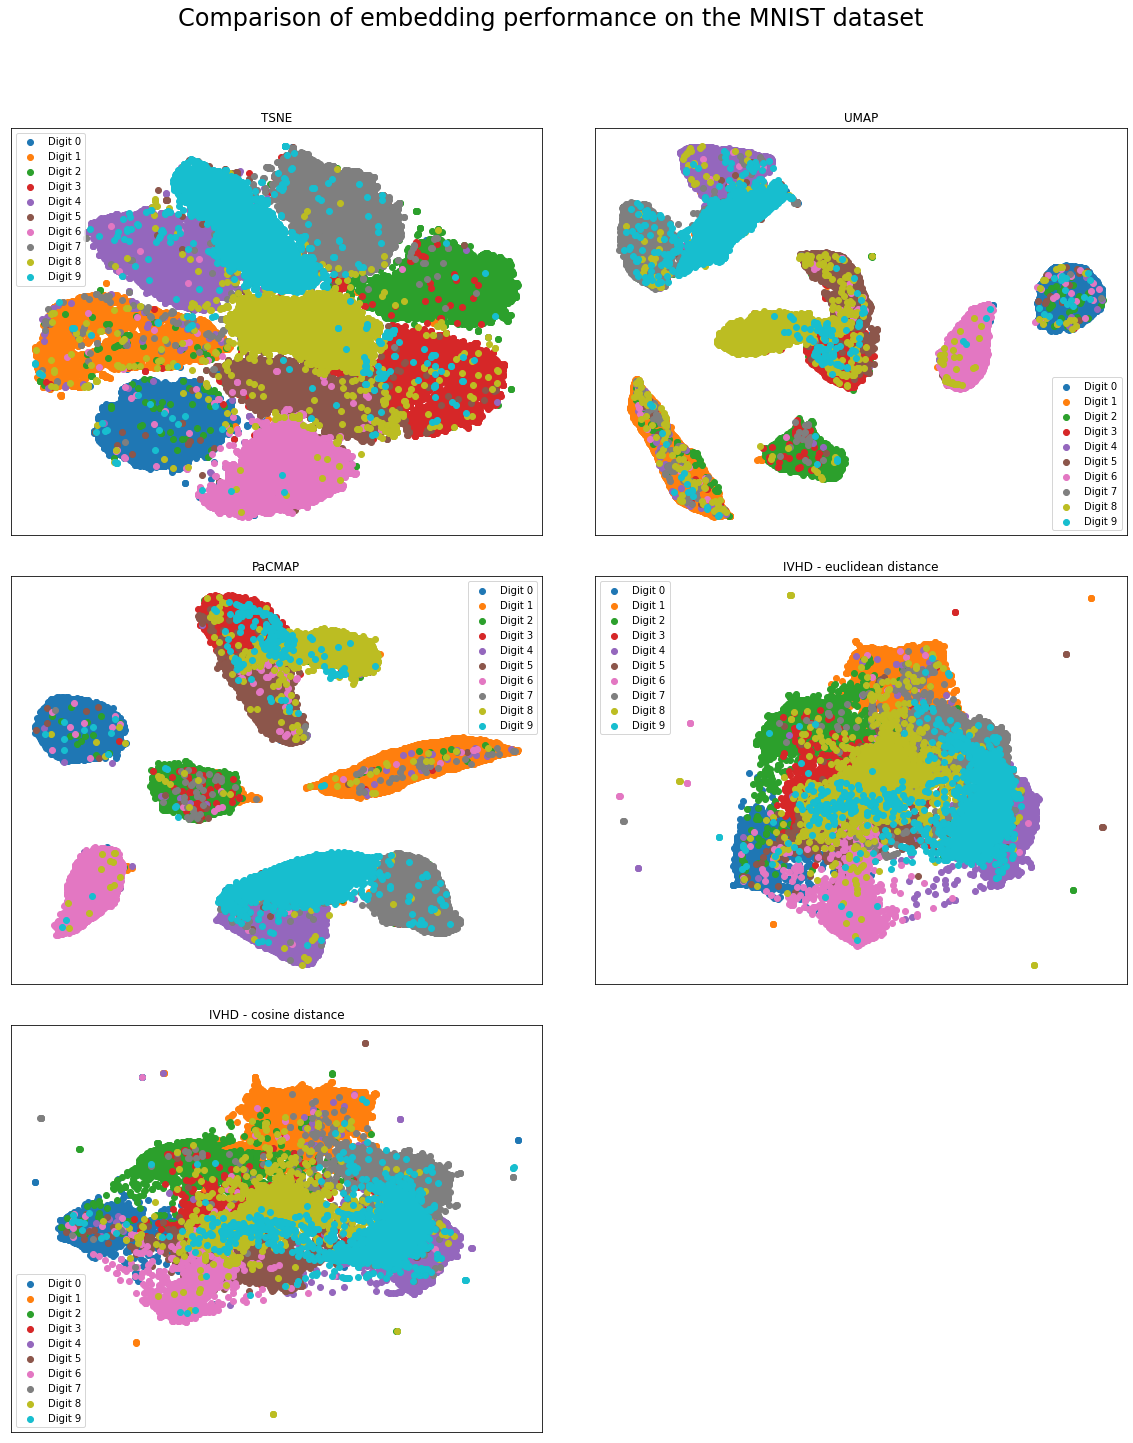

In [5]:
fig = plt.figure(figsize=(20, 24), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax00 = fig.add_subplot(spec[0, 0])
plot_2d_mnist_scatter(mnist_tsne_embedding.values, df_labels_full, 'TSNE', ax00)
ax01 = fig.add_subplot(spec[0, 1])
plot_2d_mnist_scatter(mnist_umap_embedding.values, df_labels_full, 'UMAP', ax01)
ax10 = fig.add_subplot(spec[1, 0])
plot_2d_mnist_scatter(mnist_pacmap_embedding.values, df_labels_full, 'PaCMAP', ax10)
ax11 = fig.add_subplot(spec[1, 1])
plot_2d_mnist_scatter(mnist_ivhd_euclidean_embedding.values, df_labels_full, 'IVHD - euclidean distance', ax11)
ax20 = fig.add_subplot(spec[2, 0])
plot_2d_mnist_scatter(mnist_ivhd_cosine_embedding.values, df_labels_full, 'IVHD - cosine distance', ax20)

fig.suptitle('Comparison of embedding performance on the MNIST dataset', size=24, y=0.95)
fig.subplots_adjust(wspace=0.1, hspace=0.1) 
plt.show()

In [6]:
tsne_embedding = TSNE(n_components=2).fit_transform(df_data.values)
df_tsne_embedding = pd.DataFrame(data=tsne_embedding)

random_embedding = np.random.rand(len(df), 2)
df_random_embedding = pd.DataFrame(data=random_embedding)

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


#### Calculate Metrics based on co-rank matrix

In [7]:
import metrics.co_rank_matrix_based_metric 
reload(metrics.co_rank_matrix_based_metric)

from metrics.co_rank_matrix_based_metric import CoRankMatrixBasedMetric

In [8]:
tsne_embedding_metric = CoRankMatrixBasedMetric(
    df_data,
    df_tsne_embedding,
    df_labels
)

random_embedding_metric = CoRankMatrixBasedMetric(
    df_data,
    df_random_embedding,
    df_labels
)

In [9]:
tsne_embedding_metric_value = json.loads(tsne_embedding_metric.calculate())

C:\Users\ASROCK\Desktop\studia\DS\Sem1\WDZD\projekt\data-embedding-and-visualization\metrics\co_rank_matrix_based_metric.py:117: RuntimeWarning: invalid value encountered in long_scalars
  return numerator / denominator
C:\Users\ASROCK\Desktop\studia\DS\Sem1\WDZD\projekt\data-embedding-and-visualization\metrics\co_rank_matrix_based_metric.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return numerator / denominator


CoRankMatrixBasedMetric calculation took 72.15 seconds.


In [10]:
random_embedding_metric_value = json.loads(random_embedding_metric.calculate())

C:\Users\ASROCK\Desktop\studia\DS\Sem1\WDZD\projekt\data-embedding-and-visualization\metrics\co_rank_matrix_based_metric.py:117: RuntimeWarning: invalid value encountered in long_scalars
  return numerator / denominator
C:\Users\ASROCK\Desktop\studia\DS\Sem1\WDZD\projekt\data-embedding-and-visualization\metrics\co_rank_matrix_based_metric.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return numerator / denominator


CoRankMatrixBasedMetric calculation took 68.15 seconds.


Text(0.5, 0.98, '[MNIST t-SNE embedding] \nVisualization of the metric results based on co-rank matrix')

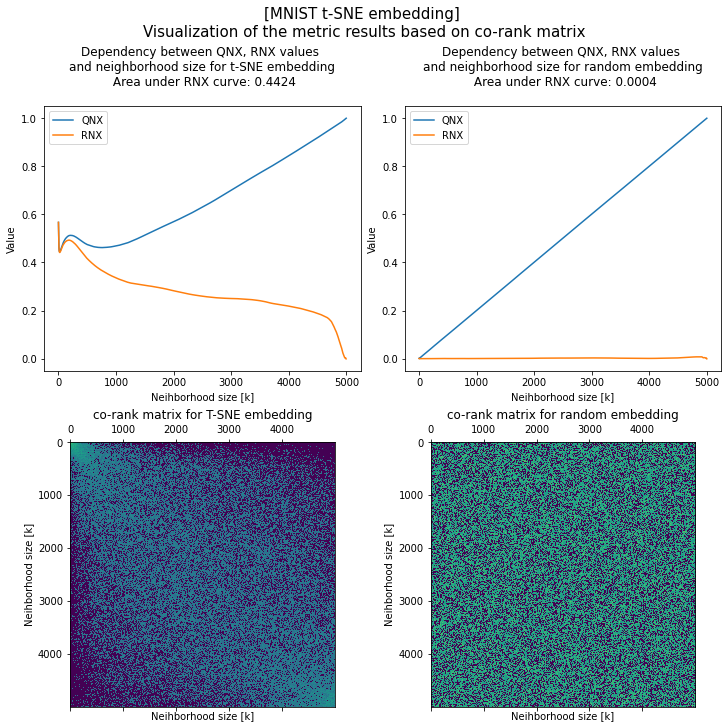

In [11]:
fig = plt.figure(figsize=(10, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 2)

ax00 = fig.add_subplot(spec[0, 0])
ax00.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for t-SNE embedding'
               f'\n Area under RNX curve: {tsne_embedding_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax00.set_xlabel('Neihborhood size [k]')
ax00.set_ylabel('Value')
ax00.plot(tsne_embedding_metric_value['QNX'], label='QNX')
ax00.plot(tsne_embedding_metric_value['RNX'], label='RNX')
# ax00.fill_between(np.arange(0, len(z3['RNX'])), z3['RNX'], color='orange', alpha=0.15)
ax00.legend()

ax01 = fig.add_subplot(spec[0, 1])
ax01.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for random embedding'
               f'\n Area under RNX curve: {random_embedding_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax01.set_xlabel('Neihborhood size [k]')
ax01.set_ylabel('Value')
ax01.plot(random_embedding_metric_value['QNX'], label='QNX')
ax01.plot(random_embedding_metric_value['RNX'], label='RNX')
# ax00.fill_between(np.arange(0, len(z3['RNX'])), z3['RNX'], color='orange', alpha=0.15)
ax01.legend()


ax10 = fig.add_subplot(spec[1, 0])
ax10.set_title("co-rank matrix for T-SNE embedding")
ax10.set_xlabel('Neihborhood size [k]')
ax10.set_ylabel('Neihborhood size [k]')
ax10.matshow(np.log(tsne_embedding_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax11 = fig.add_subplot(spec[1, 1])
ax11.set_title("co-rank matrix for random embedding")
ax11.set_xlabel('Neihborhood size [k]')
ax11.set_ylabel('Neihborhood size [k]')
ax11.matshow(np.log(random_embedding_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

fig.suptitle('[MNIST t-SNE embedding] \nVisualization of the metric results based on co-rank matrix', size=15)

## Shepard's diagrams

In [12]:
from metrics.sheppards_diagram import ShepardDiagram

In [13]:
tsne_diagram = ShepardDiagram(df_data_full, mnist_tsne_embedding, df_labels_full)
umap_diagram = ShepardDiagram(df_data_full, mnist_umap_embedding, df_labels_full)
pacmap_diagram = ShepardDiagram(df_data_full, mnist_pacmap_embedding, df_labels_full)
ivhd_euclidean_diagram = ShepardDiagram(df_data_full, mnist_ivhd_euclidean_embedding, df_labels_full)
ivhd_cosine_diagram = ShepardDiagram(df_data_full, mnist_ivhd_cosine_embedding, df_labels_full)

In [14]:
tsne_diagram.calculate()
umap_diagram.calculate()
pacmap_diagram.calculate()
ivhd_euclidean_diagram.calculate()
ivhd_cosine_diagram.calculate()

ShepardDiagram calculation took 0.03 seconds.
ShepardDiagram calculation took 0.02 seconds.
ShepardDiagram calculation took 0.02 seconds.
ShepardDiagram calculation took 0.02 seconds.
ShepardDiagram calculation took 0.02 seconds.


In [15]:
def draw_diagram(x, y, title, ax):
    ax.scatter(x, y, alpha=0.5)
    ax.set_xlabel('Input distance')
    ax.set_ylabel('Output distance')
    plt.title(title)
    ax.grid()

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\ipykernel_launcher.py:16: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  


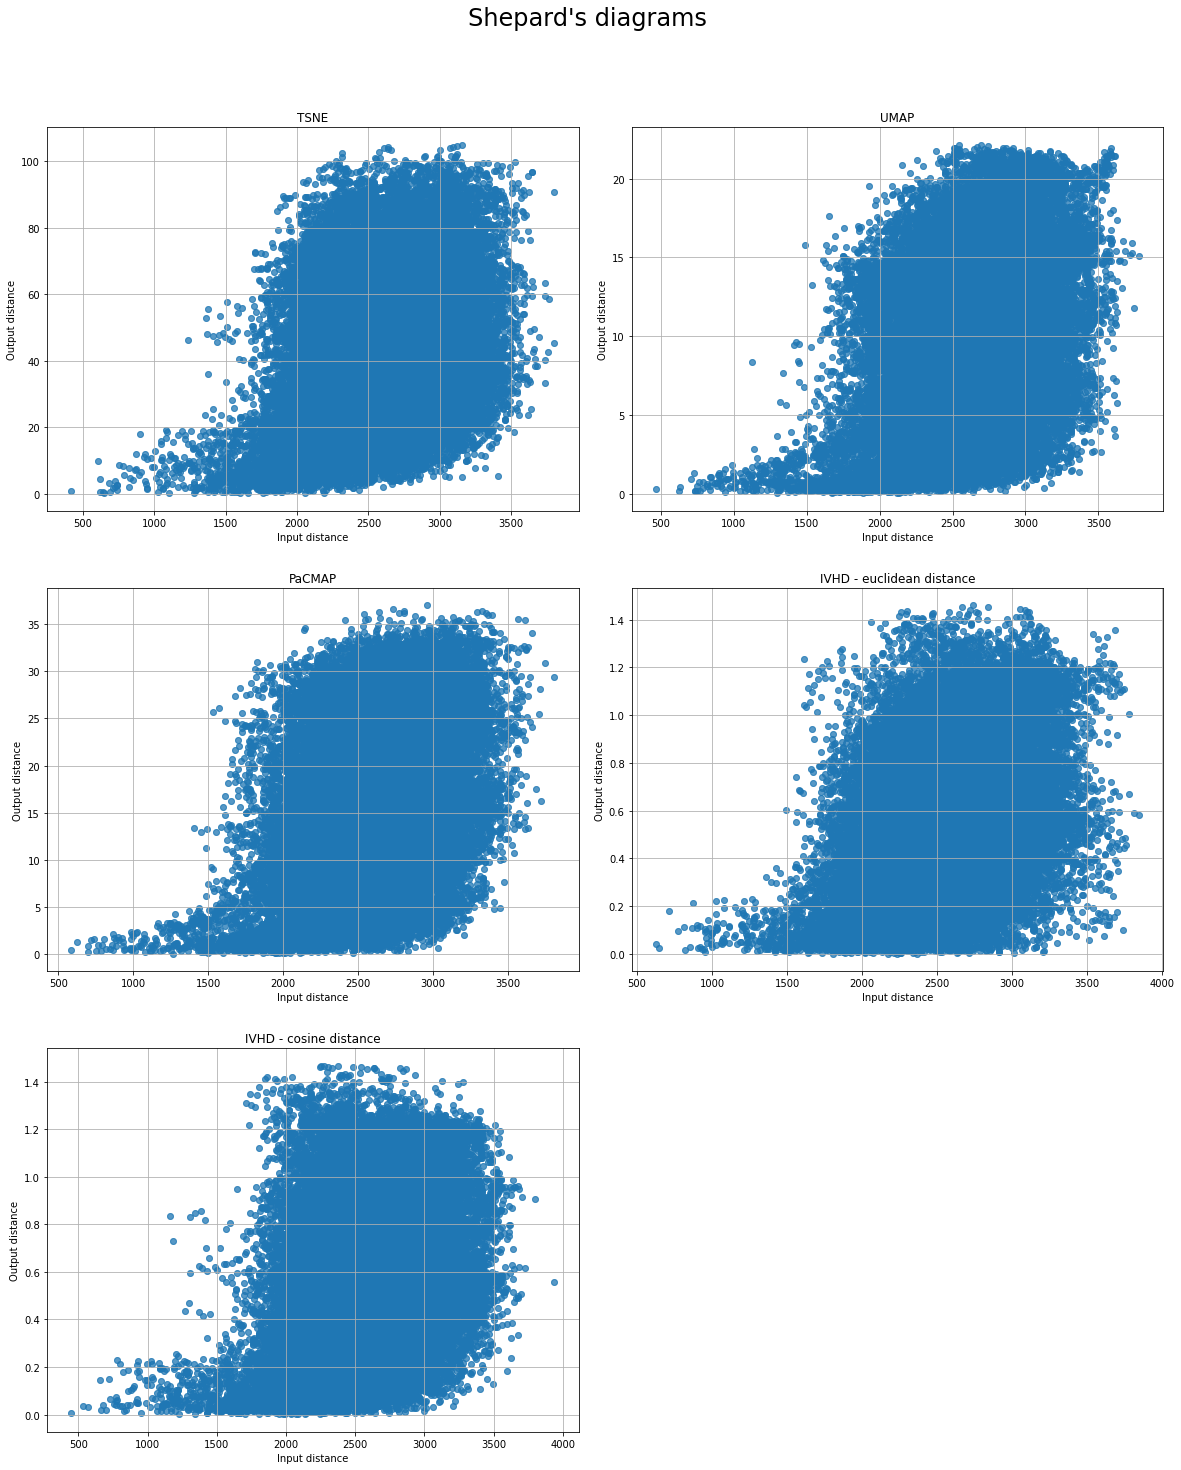

In [16]:
fig = plt.figure(figsize=(20, 24), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax00 = fig.add_subplot(spec[0, 0])
draw_diagram(tsne_diagram.original_distances, tsne_diagram.embedding_distances, 'TSNE', ax00)
ax01 = fig.add_subplot(spec[0, 1])
draw_diagram(umap_diagram.original_distances, umap_diagram.embedding_distances, 'UMAP', ax01)
ax10 = fig.add_subplot(spec[1, 0])
draw_diagram(pacmap_diagram.original_distances, pacmap_diagram.embedding_distances, 'PaCMAP', ax10)
ax11 = fig.add_subplot(spec[1, 1])
draw_diagram(ivhd_euclidean_diagram.original_distances, ivhd_euclidean_diagram.embedding_distances, 'IVHD - euclidean distance', ax11)
ax20 = fig.add_subplot(spec[2, 0])
draw_diagram(ivhd_cosine_diagram.original_distances, ivhd_cosine_diagram.embedding_distances, 'IVHD - cosine distance', ax20)

fig.suptitle('Shepard\'s diagrams', size=24, y=0.95)
fig.subplots_adjust(wspace=0.1, hspace=0.2) 
plt.show()